# Perceptrón
## Definición
El perceptrón multicapa es una red neuronal artificial (RNA) formada por múltiples capas, de tal manera que tiene capacidad para resolver problemas que no son linealmente separables, lo cual es la principal limitación del perceptrón (también llamado perceptrón simple). El perceptrón multicapa puede estar totalmente o localmente conectado. En el primer caso cada salida de una neurona de la capa "i" es entrada de todas las neuronas de la capa "i+1", mientras que en el segundo cada neurona de la capa "i" es entrada de una serie de neuronas (región) de la capa "i+1".

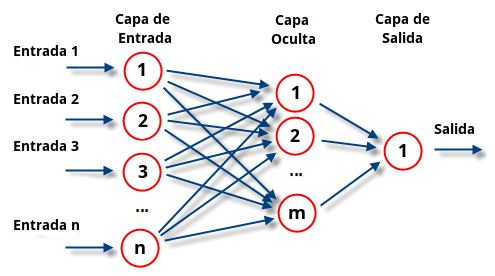

In [1]:
#Importando las herramientas que se usan para trabajar
import numpy as np
import matplotlib.pyplot as plt
import time

## Datos a trabajar

In [2]:
#vector de error
err_vector = [] 
#vector de pesos finales
w_f = [] 

#entradas
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
print(f"Entradas:\n{x}\n")

#target
t = np.array([[0], [1], [1], [1]])
print(f"Target:\n{t}\n")

#aprendizaje
alpha = 0.25
print(f"Alpha:\n{alpha}\n")
#Iniciamos cronometro
tic = time.time() 

Entradas:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

Target:
[[0]
 [1]
 [1]
 [1]]

Alpha:
0.25



## Creación de estructura del perceptrón

In [3]:
#Se crea una columna de bias (-1) del tamaño de columnas de la matriz de entrada 
#Se establece el tamaño del bias que debe ser del numero de columas que tiene x
bias = np.shape(x)[0] #[0] -> columnas      [1] -> filas
bias = -1*np.ones((bias, 1)) # np.ones((filas,columnas))
print(f"Bias:\n{bias}\n")

#concatenar x con bias "Vector Aumentado
x = np.concatenate([x, bias], axis = 1) #1 -> añade a la derecha   0 -> añade abajo
print(f"Matriz Aumentada:\n{x}\n")

#matriz de pesos
w_i = np.array([[0.5],[0.5],[-0.5]])
#w_i = np.random.randn(3, 1) #matriz de pesos aleatorios
print(f"Pesos:\n{w_i}\n")


Bias:
[[-1.]
 [-1.]
 [-1.]
 [-1.]]

Matriz Aumentada:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

Pesos:
[[ 0.5]
 [ 0.5]
 [-0.5]]



## Regla del perceptrón

In [4]:
# Producto vectorial punto
a = np.dot(x, w_i)
print(f"a:\n{a}\n")

#Funcion Limite Duro
y= np.uint32(a >= 0)
print(f"y:\n{y}\n")

# Función de costo -- MSE Error cuadrático medio
err = sum((t - y) ** 2) / len(y)
err_vector.append(err)
print(f"Error:\n{err_vector}\n")

a:
[[0.5]
 [1. ]
 [1. ]
 [1.5]]

y:
[[1]
 [1]
 [1]
 [1]]

Error:
[array([0.25])]



## Funcionamiento

In [5]:
#época
epoch = 0

#mientras la salida de la RNA no sea igual al target
while(sum(y != t)): 
  epoch += 1
  print(f"Epoca: {epoch}\n")

  for i in range(np.shape(x)[0]): #Repetir segun la cantidad de filas de x
    # Producto punto
    a = np.dot(x[i], w_i)

    #Limite Duro
    y[i]= np.uint32(a >= 0)

    # Actualización de pesos
    x_p = np.reshape(x[i], (len(w_i), 1)) #REACOMODA np.reshape(matriz,(filas,columnas))
    w_n = w_i + alpha * (t[i] - y[i]) * x_p
    w_i = w_n
    #print(f"Peso nuevo:\n{w_i}\n")
 
  # Función de costo -- MSE Error cuadrático medio
  err = sum((t - y) ** 2) / len(y)
  err_vector.append(err)
  print(f"Error:\n{err}\n")

  #Se añade al vector de pesos
  w_f.append(w_i)
  print(f"Vector de Pesos Finales:\n{w_f}\n")


toc = time.time() #Paro cronometro

Epoca: 1

Error:
[0.25]

Vector de Pesos Finales:
[array([[ 0.5 ],
       [ 0.5 ],
       [-0.25]])]

Epoca: 2

Error:
[0.25]

Vector de Pesos Finales:
[array([[ 0.5 ],
       [ 0.5 ],
       [-0.25]]), array([[0.5],
       [0.5],
       [0. ]])]

Epoca: 3

Error:
[0.25]

Vector de Pesos Finales:
[array([[ 0.5 ],
       [ 0.5 ],
       [-0.25]]), array([[0.5],
       [0.5],
       [0. ]]), array([[0.5 ],
       [0.5 ],
       [0.25]])]

Epoca: 4

Error:
[0.]

Vector de Pesos Finales:
[array([[ 0.5 ],
       [ 0.5 ],
       [-0.25]]), array([[0.5],
       [0.5],
       [0. ]]), array([[0.5 ],
       [0.5 ],
       [0.25]]), array([[0.5 ],
       [0.5 ],
       [0.25]])]



## Graficando resultados

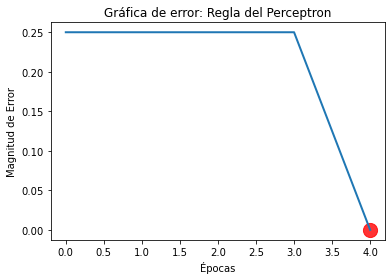

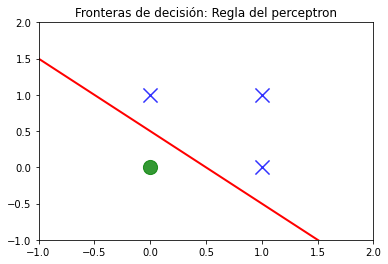

In [6]:
# Plotting Error -- Graph
plt.figure(0)
plt.plot(err_vector, linewidth = 2)
plt.title('Gráfica de error: Regla del Perceptron')
plt.ylabel('Magnitud de Error')
plt.xlabel('Épocas')
plt.scatter(len(err_vector) - 1, 0, color = 'r', s = 200, marker = 'o', alpha = 0.8)
plt.show()

# Plotting Decision Boundaries
plt.xlim([-1.0, 2.0])
plt.ylim([-1.0, 2.0])

patterns = np.unique(t) #Encuentra los elementos únicos de la matriz t

for patt in patterns:
  pos = np.where(patt == t)[0] # np.where(TRUE)[0]
  if patt == 0:
    plt.scatter(x[pos, 0], x[pos, 1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
  else:
    plt.scatter(x[pos, 0], x[pos, 1], color = 'b', s = 200, marker = 'x', alpha = 0.8)

x1 = np.linspace(-1, 2)
x2 = w_i[2] / w_i[1] - (x1 * w_i[0]) / w_i[1]

plt.figure(1)
plt.plot(x1, x2, 'red', linewidth = 2)
plt.title('Fronteras de decisión: Regla del perceptron')
plt.show()